In [6]:
# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)

[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"
[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining req

ERROR: Error in 60 - t: non-numeric argument to binary operator


In [11]:
library(igraph)

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"
# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_forward_citations <- function(doi, token, limit = 10) {
  Sys.sleep(1)  # Introduce a delay to avoid hitting rate limits
  print(paste("Fetching forward citations for:", doi))
  cites_data <- get_refs(doi, get_records = 'citations', token = token)
  
  # Check if the returned data has the expected structure
  if (is.list(cites_data) && !is.null(cites_data$display) && !is.null(cites_data$display$doi)) {
    cites <- cites_data$display$doi
    # Limit to the desired number of citations
    cites <- cites[1:min(limit, length(cites))]
    return(cites)
  } else {
    print("Unexpected data structure returned from get_refs.")
    return(NULL)
  }
}

# Create an empty graph
g <- graph.empty(directed = TRUE)
# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Fetch forward citations for the initial paper
initial_citations <- get_forward_citations(initial_doi, token, limit = 10)
if (!is.null(initial_citations)) {
  # Add the initial forward citations to the graph and edges from the initial paper to these citations
  g <- add_vertices(g, length(initial_citations), name = initial_citations)
  g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))
  
  # For each of the initial forward citations, fetch their forward citations
  for (cite in initial_citations) {
    if (!is.na(cite)) {
      secondary_citations <- get_forward_citations(cite, token, limit = 10)
      if (!is.null(secondary_citations)) {
        for (sec_cite in secondary_citations) {
          if (!is.na(sec_cite)) {
            if (!(sec_cite %in% V(g)$name)) {
              g <- add_vertices(g, 1, name = sec_cite)
            }
            g <- add_edges(g, c(cite, sec_cite))
          }
        }
      }
    }
  }
}

print("Graph construction complete!")
plot(g)


In [9]:
library(igraph)

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"
# Define your token from Lens.org
token <- "YOUR_TOKEN_HERE"

get_forward_citations <- function(doi, token, limit = 10) {
  Sys.sleep(1)  # Introduce a delay to avoid hitting rate limits
  print(paste("Fetching forward citations for:", doi))
  cites_data <- get_refs(doi, get_records = 'citations', token = token)
  
  # Check if the returned data has the expected structure
  if (is.list(cites_data) && !is.null(cites_data$display) && !is.null(cites_data$display$doi)) {
    cites <- cites_data$display$doi
    # Limit to the desired number of citations
    cites <- cites[1:min(limit, length(cites))]
    return(cites)
  } else {
    print("Unexpected data structure returned from get_refs.")
    return(NULL)
  }
}

# Create an empty graph
g <- graph.empty(directed = TRUE)
# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Fetch forward citations for the initial paper
initial_citations <- get_forward_citations(initial_doi, token, limit = 10)
if (!is.null(initial_citations)) {
  # Add the initial forward citations to the graph and edges from the initial paper to these citations
  g <- add_vertices(g, length(initial_citations), name = initial_citations)
  g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))
  
  # For each of the initial forward citations, fetch their forward citations
  for (cite in initial_citations) {
    if (!is.na(cite)) {
      secondary_citations <- get_forward_citations(cite, token)
      if (!is.null(secondary_citations)) {
        for (sec_cite in secondary_citations) {
          if (!is.na(sec_cite)) {
            if (!(sec_cite %in% V(g)$name)) {
              g <- add_vertices(g, 1, name = sec_cite)
            }
            g <- add_edges(g, c(cite, sec_cite))
          }
        }
      }
    }
  }
}

print("Graph construction complete!")
plot(g)


In [3]:
library(igraph)
library(citationchaser)

[1] "Fetching forward citations for: 10.1109/CVPR.2016.91"
[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Seeking citations..."
[1] "Citations per record sought:"
[1] 21168
[1] "Total citations sought:"
[1] 21168
[1] "Citations record list: "
    [1] "000-002-367-635-635" "000-009-521-444-696" "000-010-638-209-92X"
    [4] "000-017-713-817-442" "000-020-966-542-974" "000-024-364-999-22X"
    [7] "000-025-110-836-978" "000-031-513-758-135" "000-035-455-456-742"
   [10] "000-037-376-902-811" "000-051-707-082-100" "000-062-221-974-081"
   [13] "000-065-406-715-83X" "000-073-174-709-050" "000-080-610-253-957"
   [16] "000-087-405-267-542" "000-092-022-873-46

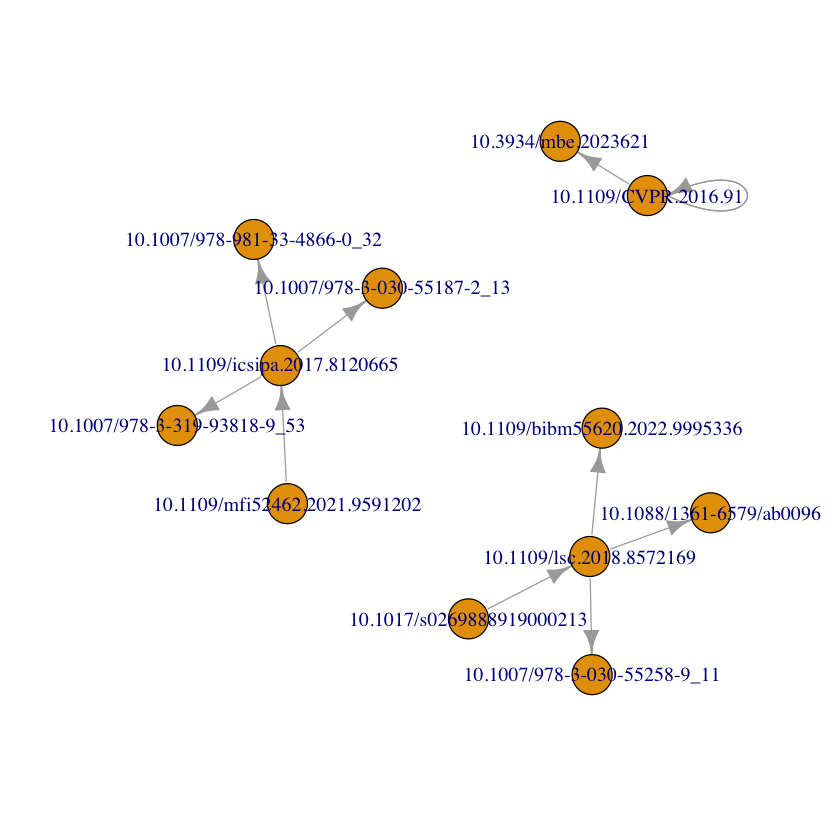

In [8]:
# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_forward_citations <- function(doi, token, limit = 10) {
  Sys.sleep(1)  # Introduce a delay to avoid hitting rate limits
  print(paste("Fetching forward citations for:", doi))
  cites_data <- get_refs(doi, get_records = 'citations', token = token)
  
  # Check if the returned data has the expected structure
  if (is.list(cites_data) && !is.null(cites_data$display) && !is.null(cites_data$display$doi)) {
    cites <- cites_data$display$doi
    # Limit to the desired number of citations
    cites <- cites[1:min(limit, length(cites))]
    return(cites)
  } else {
    print("Unexpected data structure returned from get_refs.")
    return(NULL)
  }
}


initial_citations <- get_forward_citations(initial_doi, token, limit = 5)  # Limit to 5 citations for the initial paper
print("Initial forward citations fetched:")
print(initial_citations)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial forward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial forward citations, fetch their forward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_forward_citations(cite, token, limit = 3)  # Limit to 3 citations for each citation
    print(paste("Secondary forward citations for", cite, ":"))
    print(secondary_citations)
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

print("Graph construction complete!")
# Now, g is your desired directed network
plot(g)


In [5]:
# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_forward_citations <- function(doi, token, limit = 10) {

  cites <- get_refs(doi, get_records = 'citations', token = token)$display$doi
  # Limit to the desired number of citations
  cites <- cites[1:min(limit, length(cites))]
  return(cites)
  
}

initial_citations <- get_forward_citations(initial_doi, token)
print(initial_citations)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial forward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial forward citations, fetch their forward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_forward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Seeking citations..."
[1] "Citations per record sought:"
[1] 21168
[1] "Total citations sought:"
[1] 21168
[1] "Citations record list: "
    [1] "000-002-367-635-635" "000-009-521-444-696" "000-010-638-209-92X"
    [4] "000-017-713-817-442" "000-020-966-542-974" "000-024-364-999-22X"
    [7] "000-025-110-836-978" "000-031-513-758-135" "000-035-455-456-742"
   [10] "000-037-376-902-811" "000-051-707-082-100" "000-062-221-974-081"
   [13] "000-065-406-715-83X" "000-073-174-709-050" "000-080-610-253-957"
   [16] "000-087-405-267-542" "000-092-022-873-461" "000-096-609-628-535"
   [19] "000-101-066-844-55X" "000

ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


In [9]:
library(igraph)

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_backward_citations <- function(doi, token, limit = 10) {
  max_retries <- 5
  retry_delay <- 10 # Start with a 10-second delay
  
  for (i in 1:max_retries) {
    refs <- tryCatch({
      get_refs(doi, get_records = 'references', token = token)$display$doi
    }, error = function(e) {
      cat("Error encountered:", conditionMessage(e), "\n")
      if (i == max_retries) {
        stop("Max retries reached. Exiting...")
      }
      cat("Retrying in", retry_delay, "seconds...\n")
      Sys.sleep(retry_delay)
      retry_delay <- retry_delay * 2 # Double the delay for exponential backoff
      return(NULL)
    })
    
    if (!is.null(refs)) {
      # Limit to the desired number of citations
      refs <- refs[1:min(limit, length(refs))]
      return(refs)
    }
  }
}


initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"


In [4]:
library(igraph)

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs$doi))]
  return(refs)
}

initial_citations <- get_backward_citations(initial_doi, token)

# Extract metadata from initial_citations
cited_dois <- initial_citations$doi
cited_authors <- sapply(initial_citations$authors, function(x) paste(x, collapse = ", "))
cited_titles <- initial_citations$title
cited_years <- initial_citations$year

# ... rest of your code ...



# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Metadata extraction
cited_dois <- unique(initial_citations)
cited_authors <- setNames(sapply(initial_citations$display$authors, function(x) paste(x, collapse = ", ")), initial_citations$display$doi)
cited_titles <- setNames(initial_citations$display$title, initial_citations$display$doi)
cited_years <- setNames(initial_citations$display$year, initial_citations$display$doi)

# Add vertex attributes for author names, titles, years, and abstracts
V(g)$author <- ifelse(V(g)$name %in% names(cited_authors), cited_authors[V(g)$name], "Main Paper Author")
V(g)$title <- ifelse(V(g)$name %in% names(cited_titles), cited_titles[V(g)$name], "Main Paper Title")
V(g)$year <- ifelse(V(g)$name %in% names(cited_years), cited_years[V(g)$name], NA) # Assign NA if year is not available

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Export the network to a format that Gephi can read
write_graph(g, file = "backward_citation_network_with_extended_metadata.graphml", format = "graphml")

cat("Network file 'backward_citation_network_with_extended_metadata.graphml' has been generated!")


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


ERROR: Error in as_igraph_vs(graph, edges): 'list' object cannot be coerced to type 'double'


In [5]:
library(igraph)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph
g <- add_vertices(g, length(initial_citations), name = initial_citations)

# Correctly add edges from the initial paper to the backward citations
from_vertices <- V(g)[name %in% rep(initial_doi, length(initial_citations))]
to_vertices <- V(g)[name %in% initial_citations]
edge_list <- c(t(rbind(from_vertices, to_vertices)))
g <- add_edges(g, edge_list)

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(V(g)[name == cite], V(g)[name == sec_cite]))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(V(g)[name == cite], V(g)[name == sec_cite]))
    }
  }
}

# Now, g is your desired directed network
plot(g)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"
[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 8"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "004-193-609-931-550"
[1] "Remaining requests = 7"


ERROR: Error in simple_vs_index(x, ii, na_ok): Unknown vertex selected


I would like to analyze the network of citations in the following manner. Get key words from the abstract column of the nodes. determine topics using some kind of NLP algorithm. Then I want to then create the graph where it visualize how topics change througout time (years. )